In [1]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show

#Normalizar
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0 """
    array_min, array_max = array.min(), array.max()
    return((array - array_min)/(array_max - array_min))

def cbers_raster(raster):
    with rasterio.open(raster, 'r') as dst:
        band1 = dst.read(1)
        band2 = dst.read(2)
        band3 = dst.read(3)
        band4 = dst.read(4)
        profile = dst.profile
        
    return band1, band2, band3, band4, profile

def cbers_index():
    band1, band2, band3, band4, profile = cbers_raster(raster)
    
    #normalizar os dados
    ir = normalize(band4)
    r = normalize(band3)
    g = normalize(band2)
    b = normalize(band1)

    #creating indexes
    ndvi = (ir-r)/(ir+r) #identifica o vigor da vegetação
    ndwi = (g-ir)/(g+ir) #identifica massa d'água
    
    return ndvi, ndwi, profile

def plot_cbers():
    ndvi, ndwi, profile = cbers_index()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (21,7))
    show(ndvi, cmap = 'Greens', transform = profile['transform'], ax = ax1, title = 'NDVI INDEX')
    show(ndwi, cmap = 'Blues', transform = profile['transform'], ax = ax2, title = 'NDWI INDEX')
    
    return

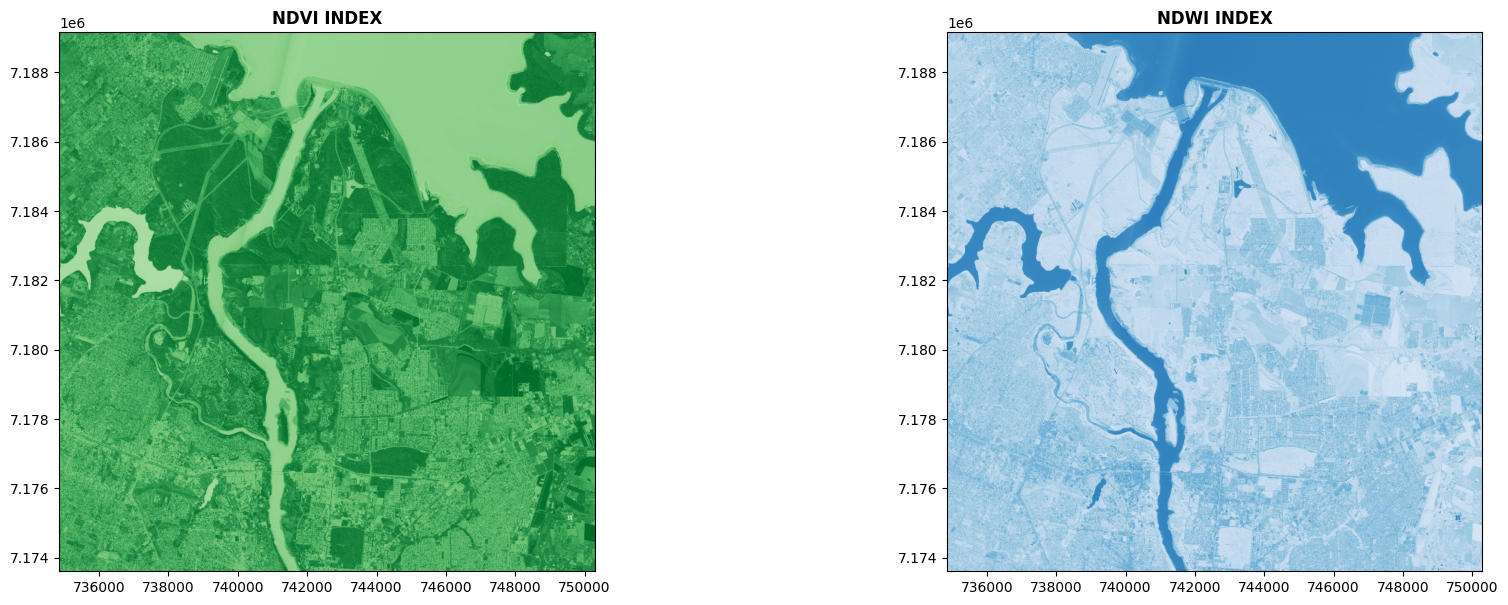

In [2]:
raster = 'cbers.tif'
plot_cbers()